#Dataset Elegido

##Información de accidentes en Barcelona

En primer lugar preparo el dataset para que sea más cómodo trabajarlo

##Import de librerías y dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.max_columns', 30) 

from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Data Science
print (' ')
%ls

/content/gdrive/MyDrive/Data Science
 
barcelona_traffic_accidents.csv  inventario_semaforos.csv
causas_accidentes.csv            inventario_sendas_peatonales.csv
Datasets_Vasquez.ipynb           netflix_movies.csv
info_accidentes.csv              Visualizacion_Vasquez.ipynb


In [3]:
df = pd.read_csv('info_accidentes.csv',sep = ',') # importo un csv y lo convierto a df
df[['Numero_Expedient','Codi_districte','Nom_districte','Codi_barri','Nom_barri','Codi_carrer','Nom_carrer','Num_postal','Descripcio_dia_setmana','NK_ Any','Mes_ any','Nom_mes','Dia_mes','Descripcio_torn','Hora_dia','Descripcio_causa_vianant','Desc_Tipus_vehicle_implicat','Descripció_sexe','Edat','Descripció_tipus_persona','Descripcio_Lloc_atropellament_vianat','Descripcio_Motiu_desplaÃ§ament_vianant','Descripcio_Motiu_desplaÃ§ament_conductor','Descripcio_victimitzacio','Coordenada_UTM_X_ED50','Coordenada_UTM_Y_ED50','Longitud_WGS84','Latitud_WGS84']]
df = df.rename(columns ={'Numero_Expedient':'Case ID', 'Codi_districte':'District ID', 'Nom_districte':'District Name', 'Codi_barri':'Neighborhood ID', 'Nom_barri':'Neighborhood Name', 'Codi_carrer':'Street ID', 'Nom_carrer':'Street Name', 'Num_postal':'Postal Code', 'Descripcio_dia_setmana':'Weekday', 'NK_ Any':'Year', 'Mes_ any':'Month', 'Nom_mes':'Month Name', 'Dia_mes':'Day', 'Descripcio_torn':'Time of Day', 'Hora_dia':'Hour', 'Descripcio_causa_vianant':'Cause', 'Desc_Tipus_vehicle_implicat':'Vehicle Involved', 'Descripció_sexe':'Sex', 'Edat':'Age', 'Descripció_tipus_persona':'Person','Descripcio_Lloc_atropellament_vianat':'Place of hit','Descripcio_Motiu_desplaÃ§ament_vianant':'Reason of Pedestrian', 'Descripcio_Motiu_desplaÃ§ament_conductor':'Reason of Driver','Descripcio_victimitzacio':'Description of Victim', 'Coordenada_UTM_X_ED50':'Coordenate X', 'Coordenada_UTM_Y_ED50':'Coordenate Y', 'Longitud_WGS84':'Longitude', 'Latitud_WGS84':'Latitude'})
df.head()

,Case ID,District ID,District Name,Neighborhood ID,Neighborhood Name,Street ID,Street Name,Postal Code,Weekday,Year,Month,Month Name,Day,Time of Day,Hour,Cause,Vehicle Involved,Sex,Age,Person,Place of hit,Reason of Pedestrian,Reason of Driver,Description of Victim,Coordenate X,Coordenate Y,Longitude,Latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Dimarts,2021,4,Abril,13,Tarda,20,No és causa del vianant,Bicicleta,Dona,8,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430455.95,4581207.96,2.167209,41.377541
1,2021S001254,1,Ciutat Vella,1,el Raval,198804,Paral·lel,0050B0050B,Divendres,2021,3,Març,12,Matí,12,No és causa del vianant,Taxi,Home,58,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430812.07,4580929.31,2.171499,41.375062
2,2021S005693,1,Ciutat Vella,1,el Raval,250904,Pelai,0056 0056,Dilluns,2021,10,Octubre,11,Tarda,19,No és causa del vianant,Veh. mobilitat personal amb motor,Dona,52,Vianant,A la vorera / Andana ...,Desconegut,Desconegut,Ferit lleu: Hospitalització fins a 24h,430626.85,4582082.01,2.169152,41.385428
3,2021S000623,1,Ciutat Vella,1,el Raval,282106,Riera Alta,0010 0010,Dissabte,2021,2,Febrer,6,Tarda,15,No és causa del vianant,Bicicleta,Home,47,Vianant,A la vorera / Andana ...,Desconegut,Desconegut,Ferit lleu: Rebutja assistència sanitària,430434.78,4581547.79,2.166916,41.380600
4,2021S005042,1,Ciutat Vella,1,el Raval,701367,Raval,0053 0053,Diumenge,2021,9,Setembre,12,Tarda,17,No és causa del vianant,Veh. mobilitat personal amb motor,Home,4,Vianant,A la vorera / Andana ...,Desconegut,Desconegut,Ferit lleu: Hospitalització fins a 24h,430746.05,4581254.77,2.170672,41.377988


##Preparación del dataset

In [4]:
# busco todos las cadenas de string presentes en el dataframe para traducir al ingles y trabajar mejor
print(df['Cause'].value_counts())
print('-------------')
print(df['Description of Victim'].value_counts())
print('-------------')
print(df['Vehicle Involved'].value_counts())
print('-------------')
print(df['Place of hit'].value_counts())
print('-------------')
print(df['Person'].value_counts())

No és causa del  vianant           8253
Desobeir el senyal del semàfor      240
Creuar per fora pas de vianants     201
Altres                               97
Transitar a peu per la calçada       61
Desobeir altres senyals               2
Name: Cause, dtype: int64
-------------
Ferit lleu: Hospitalització fins a 24h                      5962
Ferit lleu: Amb assistència sanitària en lloc d'accident    2186
Ferit lleu: Rebutja assistència sanitària                    527
Ferit greu: hospitalització superior a 24h                   167
Mort (dins 24h posteriors accident)                           12
Name: Description of Victim, dtype: int64
-------------
Motocicleta                            4131
Turisme                                1734
Bicicleta                               723
Veh. mobilitat personal amb motor       707
Ciclomotor                              547
Autobús                                 353
Furgoneta                               211
Autobús articulat              

In [5]:
# traduzco lo necesario
df['Cause'] = df['Cause'].str.replace(pat='No és causa del  vianant',repl='It is not the cause of the pedestrian',)
df['Cause'] = df['Cause'].str.replace(pat='Desobeir el senyal del semàfor',repl='Disobey the traffic light signal',)
df['Cause'] = df['Cause'].str.replace(pat='Creuar per fora pas de vianants',repl='Cross over the pedestrian crossing',)
df['Cause'] = df['Cause'].str.replace(pat='Altres',repl='Other',)
df['Cause'] = df['Cause'].str.replace(pat='Transitar a peu per la calçada',repl='Walk along the road',)
df['Cause'] = df['Cause'].str.replace(pat='Desobeir altres senyals',repl='Disobey other signals',)
df['Description of Victim'] = df['Description of Victim'].str.replace(pat='Ferit lleu: Hospitalització fins a 24h',repl='Minor injury: Hospitalization up to 24 hours',)
df['Description of Victim'] = df['Description of Victim'].str.replace(pat='Ferit lleu: Amb assistència sanitària en lloc d\'accident',repl='Minor injury: With health care in place of accident',)
df['Description of Victim'] = df['Description of Victim'].str.replace(pat='Ferit lleu: Rebutja assistència sanitària',repl='Minor injury: Refuse medical attention',)
df['Description of Victim'] = df['Description of Victim'].str.replace(pat='Ferit greu: hospitalització superior a 24h',repl='Serious injury: hospitalization for more than 24 hours',)
df['Description of Victim'] = df['Description of Victim'].str.replace(pat='Mort (dins 24h posteriors accident)',repl='Death (within 24 hours after the accident)',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Motocicleta',repl='Motorcycle',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Turisme',repl='Turism',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Bicicleta',repl='Bicycle',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Veh. mobilitat personal amb motor',repl='Personal mobility vehicle with engine',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Ciclomotor',repl='Moped',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Autobús',repl='Bus',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Furgoneta',repl='Van',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Autobús articulat',repl='Articulated Bus',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Altres vehicles amb motor',repl='Other motor vehicles',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Camió rígid <= 3,5 tones',repl='Rigid truck <= 3.5 tons',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Tot terreny',repl='All terrain',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Camió rígid > 3,5 tones',repl='Rigid truck > 3.5 tons',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Ambulància',repl='Ambulance',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Tractor camió',repl='Tractor truck',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Tren o tramvia',repl='Train',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Quadricicle < 75 cc',repl='Quadricycle < 75 cc',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Altres vehicles sense motor',repl='Other non-motorized vehicles',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Quadricicle > 75 cc  ',repl='Quadricycle > 75 cc',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Veh. mobilitat personal sense motor',repl='Personal mobility vehicle without engine',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Maquinària d\'obres i serveis',repl='Construction machinery and services',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Autocaravana',repl='Motorhome',)
df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Desconegut',repl='Unknow')
df['Reason of Pedestrian'] = df['Reason of Pedestrian'].str.replace(pat='Desconegut',repl='Unknow',)
df['Reason of Driver'] = df['Reason of Driver'].str.replace(pat='Desconegut',repl='Unknow',)
df['Weekday'] = df['Weekday'].str.replace(pat='Dilluns',repl='Monday',)
df['Weekday'] = df['Weekday'].str.replace(pat='Dimarts',repl='Tuesday',)
df['Weekday'] = df['Weekday'].str.replace(pat='Dimecres',repl='Wednesday',)
df['Weekday'] = df['Weekday'].str.replace(pat='Dijous',repl='Thursday',)
df['Weekday'] = df['Weekday'].str.replace(pat='Divendres',repl='Friday',)
df['Weekday'] = df['Weekday'].str.replace(pat='Dissabte',repl='Saturday',)
df['Weekday'] = df['Weekday'].str.replace(pat='Diumenge',repl='Sunday',)
df['Sex'] = df['Sex'].str.replace(pat='Home',repl='M',)
df['Sex'] = df['Sex'].str.replace(pat='Dona',repl='F',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='Desconegut ',repl='Unknow',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='En pas regulat per semàfor',repl='In a crosswalk regulated by traffic lights',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='Fora del pas',repl='Out of the crosswalk',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='A la vorera / Andana',repl='On the sidewalk',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='En pas sense regular',repl='In unregulated crosswalk',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='Altres',repl='Other',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='En zona peatonal',repl='In a pedestrian area',)
df['Place of hit'] = df['Place of hit'].str.replace(pat='En pas sense senyalitzar',repl='In unmarked crosswalk',)
df['Person'] = df['Person'].str.replace(pat='Conductor',repl='Driver',)
df['Person'] = df['Person'].str.replace(pat='Passatger',repl='Passenger',)
df['Person'] = df['Person'].str.replace(pat='Vianant',repl='Pedestrian',)

df

<ipython-input-5-612421a60cb9>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description of Victim'] = df['Description of Victim'].str.replace(pat='Mort (dins 24h posteriors accident)',repl='Death (within 24 hours after the accident)',)
<ipython-input-5-612421a60cb9>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Veh. mobilitat personal amb motor',repl='Personal mobility vehicle with engine',)
<ipython-input-5-612421a60cb9>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Vehicle Involved'] = df['Vehicle Involved'].str.replace(pat='Veh. mobilitat personal sense motor',repl='Personal mobility vehicle without engine',)


,Case ID,District ID,District Name,Neighborhood ID,Neighborhood Name,Street ID,Street Name,Postal Code,Weekday,Year,Month,Month Name,Day,Time of Day,Hour,Cause,Vehicle Involved,Sex,Age,Person,Place of hit,Reason of Pedestrian,Reason of Driver,Description of Victim,Coordenate X,Coordenate Y,Longitude,Latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Tuesday,2021,4,Abril,13,Tarda,20,It is not the cause of the pedestrian,Bicycle,F,8,Pedestrian,On the sidewalk ...,Oci i entreteniment,Unknow,Minor injury: Hospitalization up to 24 hours,430455.95,4581207.96,2.167209,41.377541
1,2021S001254,1,Ciutat Vella,1,el Raval,198804,Paral·lel,0050B0050B,Friday,2021,3,Març,12,Matí,12,It is not the cause of the pedestrian,Taxi,M,58,Pedestrian,On the sidewalk ...,Oci i entreteniment,Unknow,Minor injury: Hospitalization up to 24 hours,430812.07,4580929.31,2.171499,41.375062
2,2021S005693,1,Ciutat Vella,1,el Raval,250904,Pelai,0056 0056,Monday,2021,10,Octubre,11,Tarda,19,It is not the cause of the pedestrian,Personal mobility vehicle with engine,F,52,Pedestrian,On the sidewalk ...,Unknow,Unknow,Minor injury: Hospitalization up to 24 hours,430626.85,4582082.01,2.169152,41.385428
3,2021S000623,1,Ciutat Vella,1,el Raval,282106,Riera Alta,0010 0010,Saturday,2021,2,Febrer,6,Tarda,15,It is not the cause of the pedestrian,Bicycle,M,47,Pedestrian,On the sidewalk ...,Unknow,Unknow,Minor injury: Refuse medical attention,430434.78,4581547.79,2.166916,41.380600
4,2021S005042,1,Ciutat Vella,1,el Raval,701367,Raval,0053 0053,Sunday,2021,9,Setembre,12,Tarda,17,It is not the cause of the pedestrian,Personal mobility vehicle with engine,M,4,Pedestrian,On the sidewalk ...,Unknow,Unknow,Minor injury: Hospitalization up to 24 hours,430746.05,4581254.77,2.170672,41.377988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8849,2021S000346,10,Sant Martí,72,Sant Martí de Provençals,169409,Corts Catalanes,1039 1039,Friday,2021,1,Gener,22,Tarda,14,Cross over the pedestrian crossing,Turism,F,34,Pedestrian,Out of the crosswalk ...,Unknow,Unknow,Minor injury: With health care in place of acc...,433308.49,4585288.44,2.200869,41.414534
8850,2021S006395,10,Sant Martí,73,la Verneda i la Pau,60807,Cantàbria,0071 0071,Monday,2021,11,Novembre,8,Tarda,20,Cross over the pedestrian crossing,Turism,F,45,Pedestrian,Out of the crosswalk ...,Oci i entreteniment,Unknow,Minor injury: Hospitalization up to 24 hours,433122.44,4586300.72,2.198531,41.423636
8851,2021S002223,10,Sant Martí,73,la Verneda i la Pau,153205,Guipúscoa,0137 0139,Thursday,2021,4,Abril,29,Tarda,17,Walk along the road,Van,F,76,Pedestrian,Out of the crosswalk ...,Altres activitats,Unknow,Minor injury: Hospitalization up to 24 hours,433610.20,4586123.71,2.204387,41.422082
8852,2021S000209,10,Sant Martí,73,la Verneda i la Pau,195409,Maresme,0231 0231,Thursday,2021,1,Gener,14,Tarda,16,Cross over the pedestrian crossing,Turism,M,3,Pedestrian,Out of the crosswalk ...,Unknow,Unknow,Minor injury: Hospitalization up to 24 hours,433582.07,4586003.01,2.204064,41.420993


#Visualizaciones en Matplotlib

##Piechart

In [6]:
df['Vehicle Involved'] = df['Vehicle Involved'].replace('Unknow',np.nan) 
s_vehicles = df['Vehicle Involved'].value_counts()
s_vehicles

Motorcycle                                  4131
Turism                                      1734
Bicycle                                      723
Personal mobility vehicle with engine        707
Moped                                        547
Bus                                          353
Van                                          211
Bus articulat                                184
Taxi                                         122
Other motor vehicles                          32
Rigid truck <= 3.5 tons                       24
All terrain                                   21
Rigid truck > 3.5 tons                        20
Ambulance                                     11
Tractor truck                                 10
Train                                          7
Quadricycle < 75 cc                            4
Other non-motorized vehicles                   2
Quadricicle > 75 cc                            2
Personal mobility vehicle without engine       2
Construction machine

In [7]:
# el porcentaje de los vehiculos involucrados en pocos accidentes es despreciable
# por lo que los sumo a todos juntos en la categoría "Otros"

s_vehicles_main = s_vehicles.loc[s_vehicles>100]
s_vehicles_other = s_vehicles.loc[s_vehicles<100]
s_vehicles_main = s_vehicles_main.append(pd.Series(data=[s_vehicles_other.sum()],index=['Other']))

In [8]:
print('Total: ',s_vehicles_other.sum())
s_vehicles_other

Total:  138


Other motor vehicles                        32
Rigid truck <= 3.5 tons                     24
All terrain                                 21
Rigid truck > 3.5 tons                      20
Ambulance                                   11
Tractor truck                               10
Train                                        7
Quadricycle < 75 cc                          4
Other non-motorized vehicles                 2
Quadricicle > 75 cc                          2
Personal mobility vehicle without engine     2
Construction machinery and services          2
Motorhome                                    1
Name: Vehicle Involved, dtype: int64

Text(0.5, 1.0, 'Piechart de vehículos envueltos en accidentes')

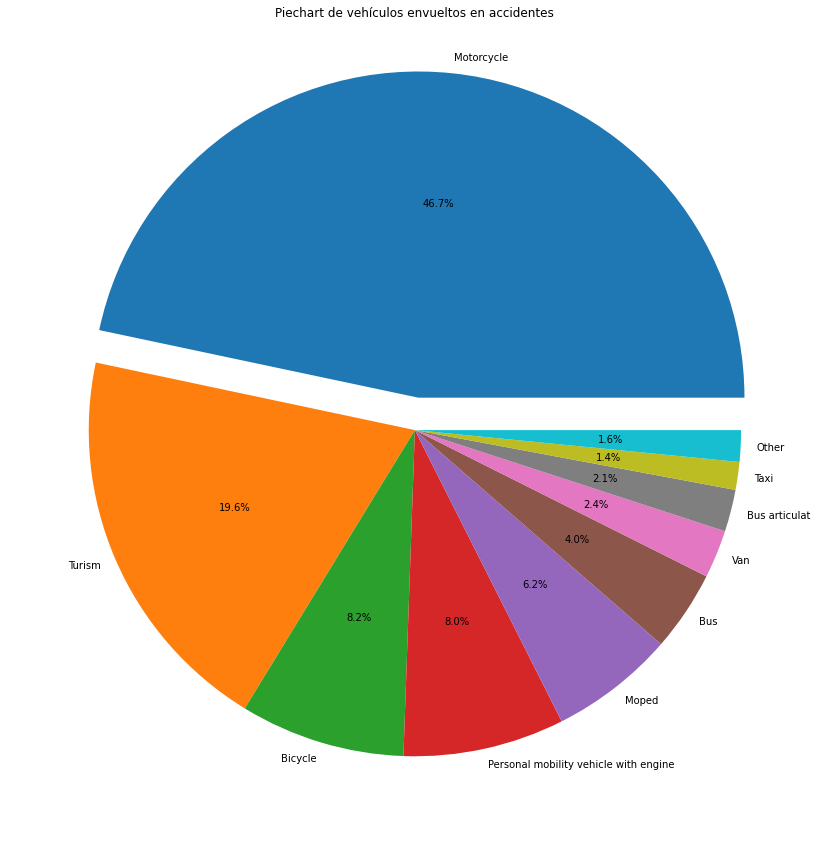

In [9]:
fig,ax = plt.subplots(figsize =(25, 15))
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(s_vehicles_main, labels = s_vehicles_main.index, explode= myexplode,
       autopct = '%1.1f%%', pctdistance=.6, labeldistance=1.05)
ax.set_title('Piechart de vehículos envueltos en accidentes')

A través del piechart podemos ver la marcada tendencia de las motos a estar involucradas en accidentes. Casi la mitad de los accidentes del 2021 son provocados por este tipo de vehiculo. Las bicicletas y los vehículos personales también representan un gran porcentaje.

Por otro lado, la cantidad representada por el turismo será más díficil de evaluar y poder corregir si pensamos en un potencial sistema de semaforización, el cuál quizás sea mas entendido por los residentes de la ciudad, más familiarizados con este sistema.

## Barplot

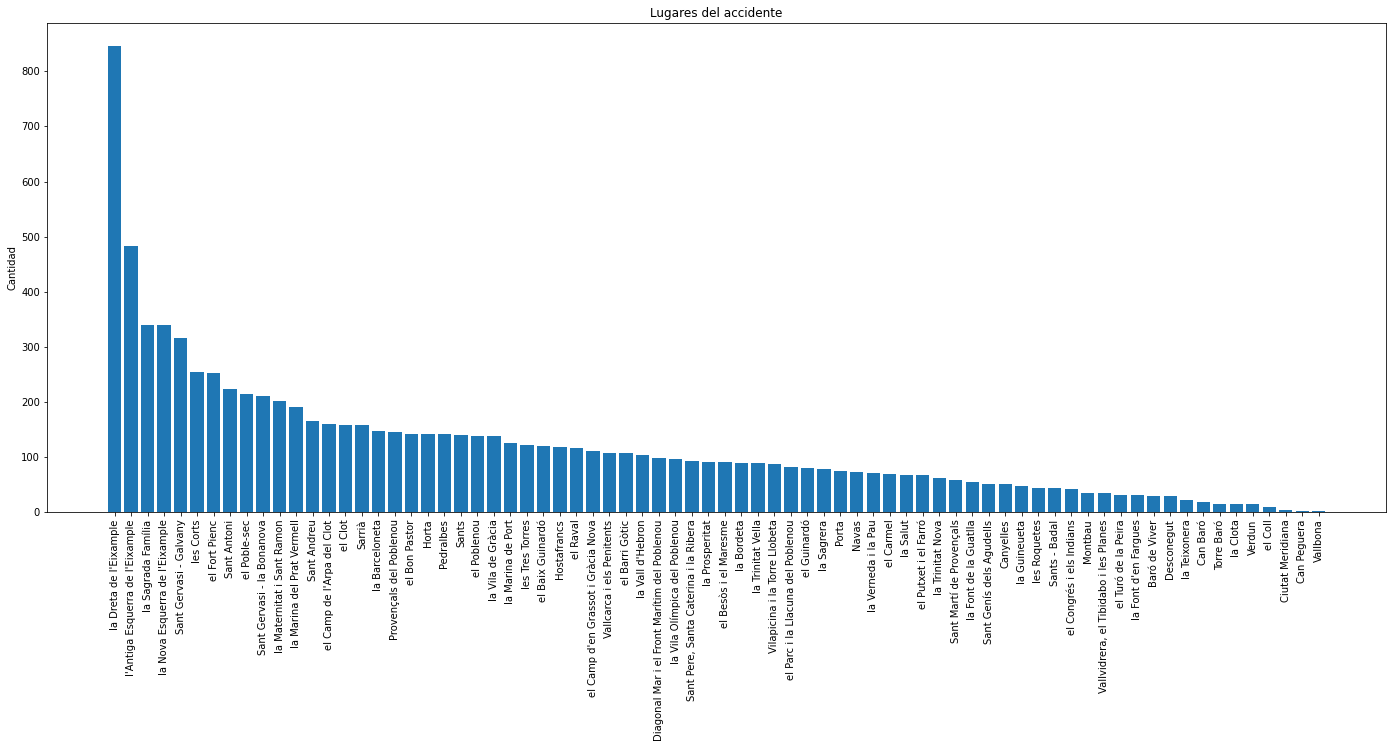

In [10]:
fig, ax = plt.subplots(figsize=(24,9))
df['Place of hit'] = df['Place of hit'].replace('Unknow',np.nan) 
ax.bar(df['Neighborhood Name'].value_counts().index, df['Neighborhood Name'].value_counts())
ax.set_title('Lugares del accidente')
ax.set_ylabel('Cantidad')
plt.xticks(rotation='vertical')
plt.show()

Este barchart nos ayudará para ver qué barrios son los más necesitados de una renovación y mejora en la seguridad vial. Una vez implementado el sistema, podemos analizar de nuevo los barrios y ver cuáles lograron disminuir la cantidad de accidentes considerablemente

##Lineplot

In [11]:
s_month = df['Month'].value_counts().sort_index(ascending=True)

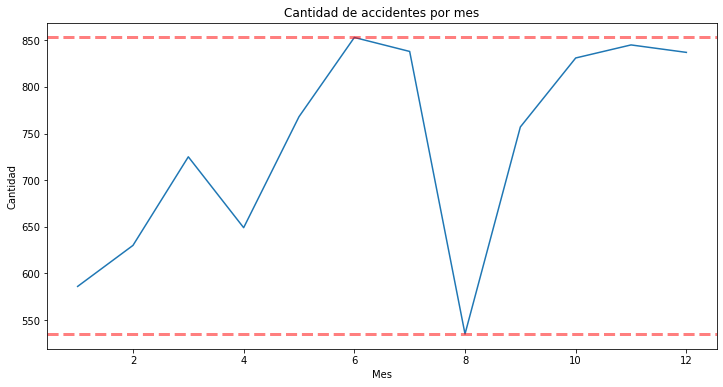

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(s_month.index, s_month)
ax.set_title('Cantidad de accidentes por mes') 
ax.set_xlabel('Mes')  
ax.set_ylabel('Cantidad') 
ax.axhline(s_month.min(), color='red', linestyle='--', alpha=0.5, linewidth=3)
ax.axhline(s_month.max(), color='red', linestyle='--', alpha=0.5, linewidth=3)

Con este lineplot podemos ver la variación de cantidad de accidentes a través de los meses. Durante el invierno (enero y febrero), pero sobre todo en verano durante Agosto, vemos que la cantidad de accidentes disminuye de manera drástica.

Por otra parte, durante el año escolar y de mayor actividad laboral y educativa vemos que los accidentes rondan entre los 600 y 800 accidentes al mes.

Con esto podemos asegurar que en el hipotético caso que pusieramos a prueba el sistema de semaforización, no tendrá la mismas exigencias en todos los meses. Deberemos encontrar en qué meses logra el objetivo de mejorar los problemasa de tránsito y en cuáles no.

#Visualizaciones en Seaborn

## Histplot

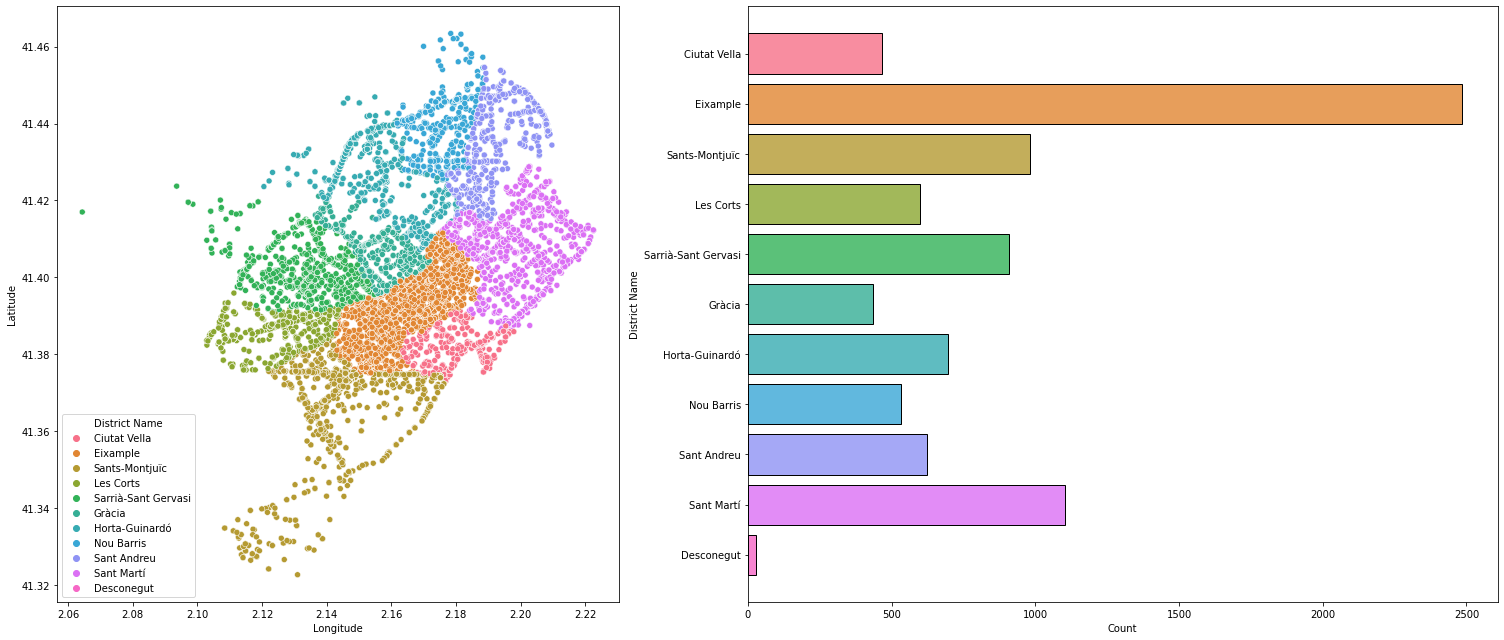

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(21, 9), gridspec_kw=dict(width_ratios=[3, 4]))

sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="District Name", ax=ax[0])
sns.histplot(data=df, y="District Name", hue="District Name", shrink=.8, alpha=.8, legend=False, ax=ax[1])

fig.tight_layout()

Parecido al barchart realizado anteriormente, este histograma muestra la cantidad de accidentes por distrito. Par hacer más fácil la visualización, se añadió un scatterplot que viene a representar un mapa de Barcelona.

Podemos concluir que las zonas más céntricas y turísticas tales como Eixample y Sant Martí son las que albergan más accidentes. También debemos comparar la cantidad de accidentes ocurridos con el tamaño de cada dsitrito, ya que distritos más alejados pero muy amplios albergan muchos accidentes por ser extensos.

## Boxplot

In [14]:
df['Age'] = df['Age'].replace('Desconegut', np.nan)
df['Sex'] = df['Sex'].replace('Desconegut', np.nan)

In [15]:
df_age_nonull = df['Age'].copy()
df_age_nonull.dropna(inplace=True)
df_age_nonull = df_age_nonull.astype(str).astype(float)

In [16]:
df['Age'].fillna(df_age_nonull.mean(), inplace=True)

In [17]:
df['Age'] = df['Age'].astype(str).astype(float)

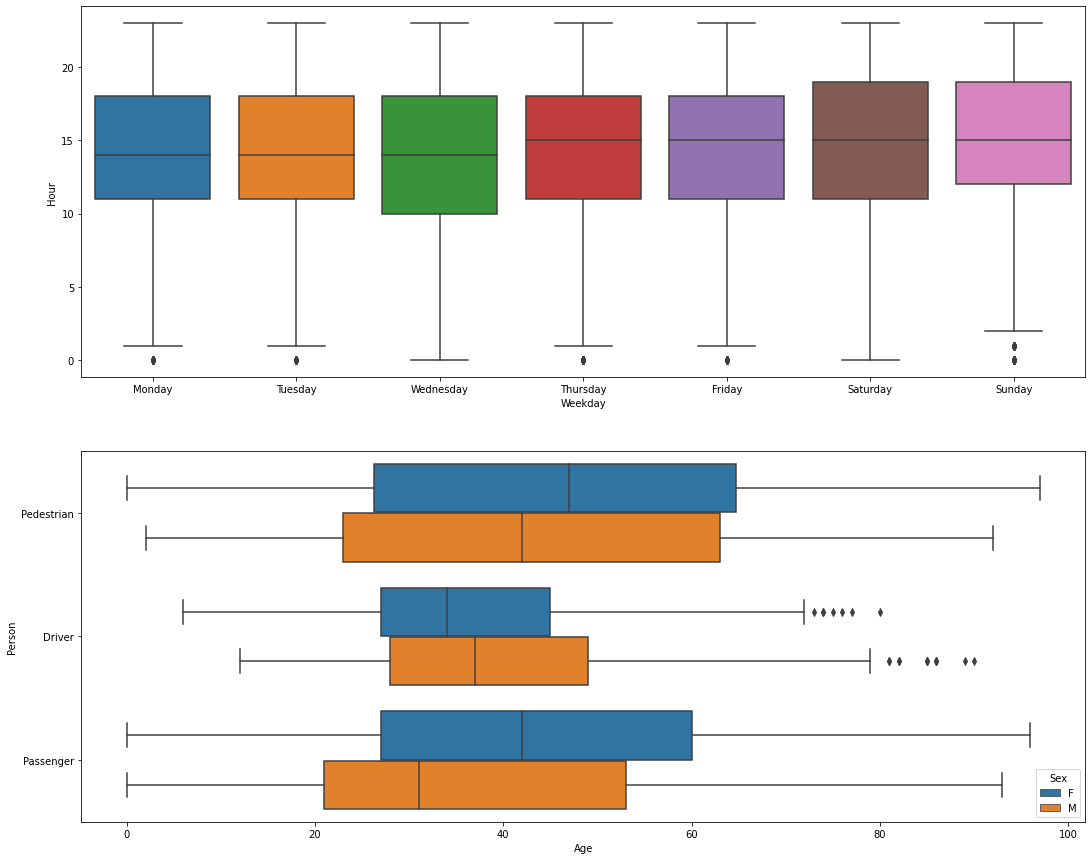

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

days_list=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
sns.boxplot(data=df, x="Weekday", y="Hour",order=days_list, ax=ax[0])
sns.boxplot(data=df, y="Person", x="Age", hue='Sex', ax=ax[1])

Con estos diagramas de cajas podemos tener respuestas más relacionadas a la estadística. Podemos analizar las horas de los accidentes en base a los días, y ver qué momento de qué día es más propenso a que haya accidentes.

Con el segundo boxplot podemos extraer información sobre el sexo y la edad de las personas involucradas en los accidentes. Según que rol cumplen, el promedio de edad en cada género varía, así como los casos especiales.

##Scatterplot

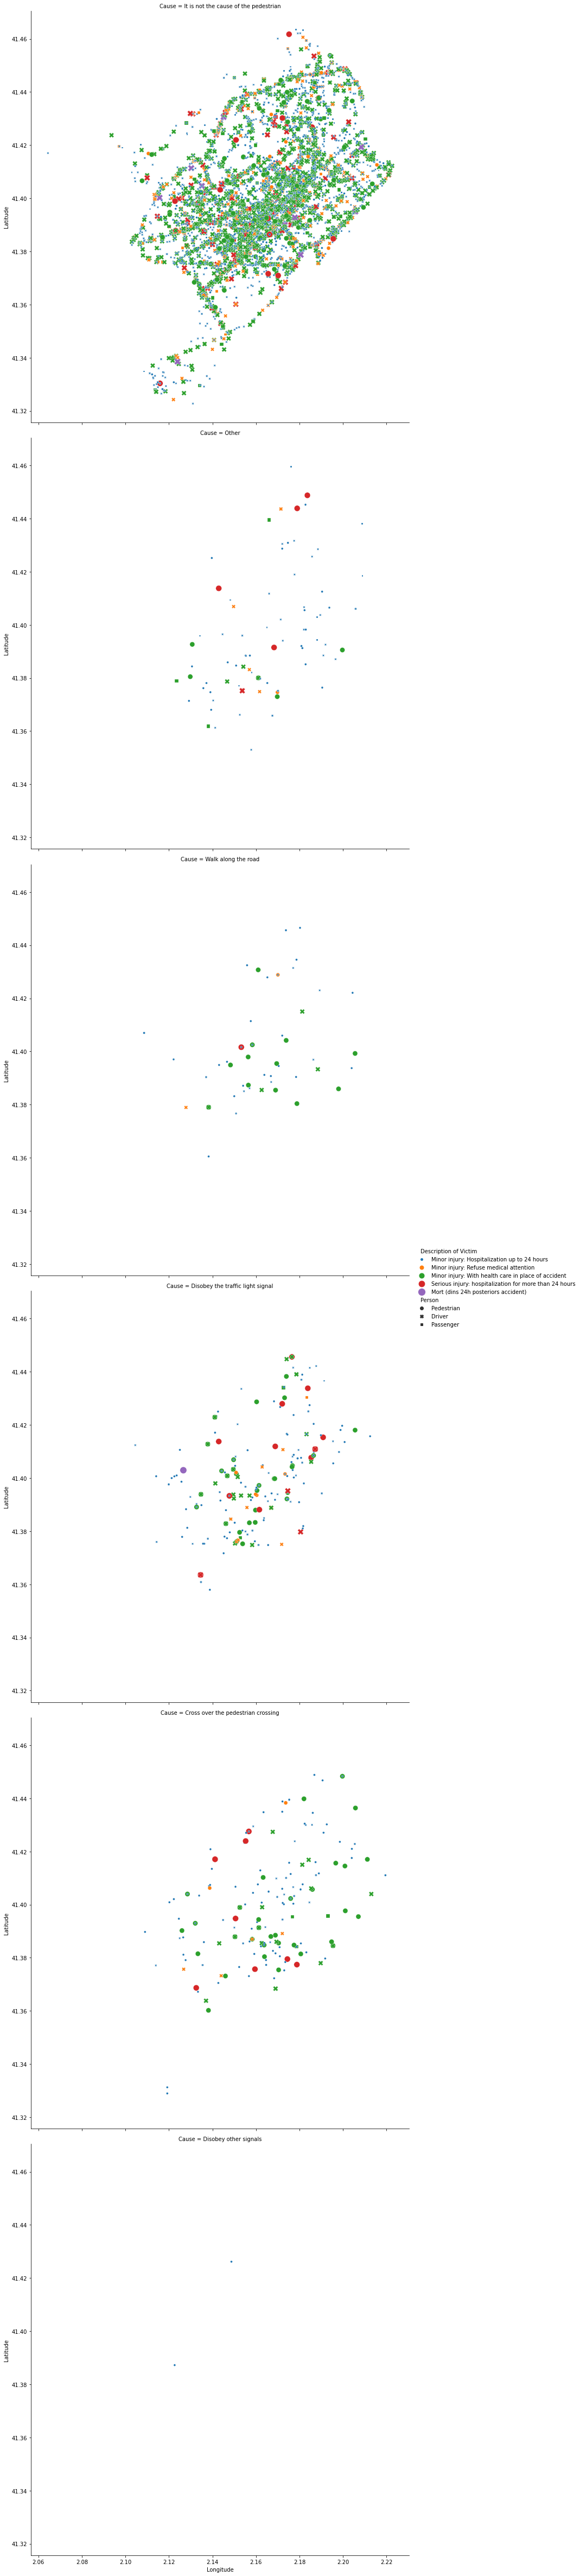

In [19]:
sns.relplot(data=df, x="Longitude", y="Latitude", col="Cause", col_wrap= 1, hue="Description of Victim", size="Description of Victim", sizes=(150,15), style="Person", kind="scatter",height=11)

Finalmente, los scatterplots tratan sobre las ubicaciones de los accidentes según sus causas. Además, el color, la forma y el tamaño identeficia que rol ocuapaba esa persona en el accidente, y cuáles fueron las consecuencias.

De esta manera, podemos analizar que causas pueden ser evitadas con el sistema de semaforización, y partir de eso, qué consecuencias prevenimos y en qué lugar. 